In [21]:
import logging
import collections
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open 
import pandas as pd
import numpy as np
from numpy import random
from collections import Counter
import heapq #check n largest
import json
import warnings
from sqlalchemy import create_engine 

In [91]:
bath_path = r'./'

computer_security_and_networks = json.load(open(bath_path + r'computer-security-and-networks.json', encoding='utf8'))
algorithms = json.load(open(bath_path + r'algorithms.json', encoding='utf8'))
cloud_computing = json.load(open(bath_path + r'cloud-computing.json', encoding='utf8'))
data_management = json.load(open(bath_path + r'data-management.json', encoding='utf8'))
design_and_product = json.load(open(bath_path + r'design-and-product.json', encoding='utf8'))
electrical_engineering = json.load(open(bath_path + r'electrical-engineering.json', encoding='utf8'))
math_and_logic = json.load(open(bath_path + r'math-and-logic.json', encoding='utf8'))
mobile_and_web_development = json.load(open(bath_path + r'mobile-and-web-development.json', encoding='utf8'))
networking = json.load(open(bath_path + r'networking.json', encoding='utf8'))
probability_and_statistics = json.load(open(bath_path + r'probability-and-statistics.json', encoding='utf8'))
security = json.load(open(bath_path + r'security.json', encoding='utf8'))
machine_learning = json.load(open(bath_path + r'machine-learning.json', encoding='utf8'))
data_analysis = json.load(open(bath_path + r'data-analysis.json', encoding='utf8'))
software_development = json.load(open(bath_path + r'software-development.json', encoding='utf8'))

all_data = computer_security_and_networks + \
algorithms + \
cloud_computing + \
data_management + \
design_and_product + \
electrical_engineering + \
math_and_logic + \
mobile_and_web_development + \
networking + \
probability_and_statistics + \
security + \
machine_learning + \
data_analysis + \
software_development


In [92]:
len(all_data)

881

In [115]:
title=[]; week_data=[]; target_audience=[]; created_by=[]; teach_by=[]
week_data_title=[]; course_info=[]; department=[]; week_data_desc=[]
package_num=[];package_name=[]; level=[]; rating=[]; index=[]
# teach_by, week_data: 多值
for n in range(len(all_data)):
    for i in range(len(all_data[n]['teach_by'])):
            title.append(all_data[n]['title'])
            target_audience.append(all_data[n]['target_audience'])
            created_by.append(all_data[n]['created_by'])
            course_info.append(all_data[n]['course_info'])
            package_num.append(all_data[n]['package_num'])
            package_name.append(all_data[n]['package_name'])
            level.append(all_data[n]['level'])
            rating.append(all_data[n]['rating']) 
            #index.append(j)
        #multiple values
            teach_by.append(list((all_data[n]['teach_by'][i].values()))[0])  
            department.append(list((all_data[n]['teach_by'][i].values()))[1])
#             week_data_title.append(list((all_data[n]['week_data'][j].values()))[0])
#             week_data_desc.append(list((all_data[n]['week_data'][j].values()))[1]) 

In [116]:
data = pd.DataFrame({'title': title,
                    'target_audience': target_audience,
                    'created_by' : created_by,  
                    'course_info': course_info,
                    'teach_by': teach_by,
                     'department': department,
                     'level': level,
                     'rating': rating,
                     'package_num': package_num,
                     'package_name': package_name          
                    },
                    columns = ['title', 'course_info', 'target_audience', 'created_by','teach_by',
                               'department','package_num','package_name', 'level','rating'])

In [123]:
data.head()

,title,course_info,target_audience,created_by,teach_by,department,package_num,package_name,level,rating
0,Bitcoin and Cryptocurrency Technologies,About this course: To really understand what i...,None,Princeton University,Arvind Narayanan,Computer Science,None,None,None,4.7
1,Cryptography I,About this course: Cryptography is an indispen...,None,Stanford University,Dan Boneh,Computer Science,None,None,None,4.8
2,Google Cloud Platform Fundamentals: Core Infra...,About this course: <<< ATTENTION >>> Learners ...,Who is this class for: This specialization is ...,Google Cloud,Google Cloud Training,None,1,Architecting with Google Cloud Platform Specia...,Intermediate,4.6
3,G Suite Administrator Fundamentals,About this course: G Suite Administrator Funda...,Who is this class for: This class is intended ...,Google Cloud,Google Cloud Training,None,None,None,Beginner,4.5
4,Usable Security,About this course: This course focuses on how ...,None,"University of Maryland, College Park",Jennifer Golbeck,Human-Computer Interaction Lab,1,Cybersecurity Specialization,None,4.5


In [98]:
len(data.title.unique())

623

In [ ]:
title=[]; week_data=[]; created_by=[]; teach_by=[]
week_data_title=[]; course_info=[]; department=[]; week_data_desc=[]

# teach_by, week_data: 多值
for n in range(len(all_data)):
    for i in range(len(all_data[n]['week_data'])):
            title.append(all_data[n]['title'])
            created_by.append(all_data[n]['created_by'])
            course_info.append(all_data[n]['course_info'])
            week_data_title.append(list((all_data[n]['week_data'][i].values()))[0])
            week_data_desc.append(list((all_data[n]['week_data'][i].values()))[1]) 

In [121]:
all_data[8]['week_data'][]

{'description': "The second module 'TCP/IP Protocol' focuses on all protocol and functional aspects of the TCP and IP operations used in your PC/laptop/smartphone. The first lecture ‘TCP/IP 5 Layers & Operations’ provides an easy-to-understand description of how TCP/IP works in the Internet to transfer information, using a comparable example of how postal mail is delivered. The lectures ‘IPv4’ and ‘IPv6’ describe how the IPv4 and IPv6 protocols are structured and how they operate. In addition, the CIDR (Classless Inter-Domain Routing) notation as well as the IPv4 and IPv6 addresses and subnets are explained. Then the lectures on ‘UDP’ and ‘TCP’ describe how the port number works and how TCP conducts flow control and detects errors in the packets you received on your PC/laptop/smartphone.",
 'title': 'TCP/IP Protocol',
 'video': ['2.1 OSI vs TCP/IP',
  '2.2 TCP/IP Network Operations',
  '2.3 TCP/IP Layers',
  '2.4 TCP/IP Networking Functions',
  '2.5 IPv4',
  '2.6 IPv6',
  '2.7 UDP',
  

In [14]:
IsDuplicated = data_to_mysql.duplicated()

In [31]:
duplicate_course=0
for i in range(len(data_to_mysql)):
    if IsDuplicated[i] == True:
        duplicate_course=duplicate_course+1
        #print(i)
print(duplicate_course)

167


In [30]:
#data = data_to_mysql.drop_duplicates()

In [31]:
#data_to_mysql.head()

### --------------------------------------------------------------------------------

In [458]:
### Testing

In [464]:
v=[]
for n in range(len(all_data)):
    for j in range(len(all_data[n]['week_data'])):     
        v.append(list((all_data[n]['week_data'][j]).values())[0])
        #a.append(pd.Series(v).str.cat(sep='')) 

In [385]:
v= pd.Series(v).str.cat(sep='')

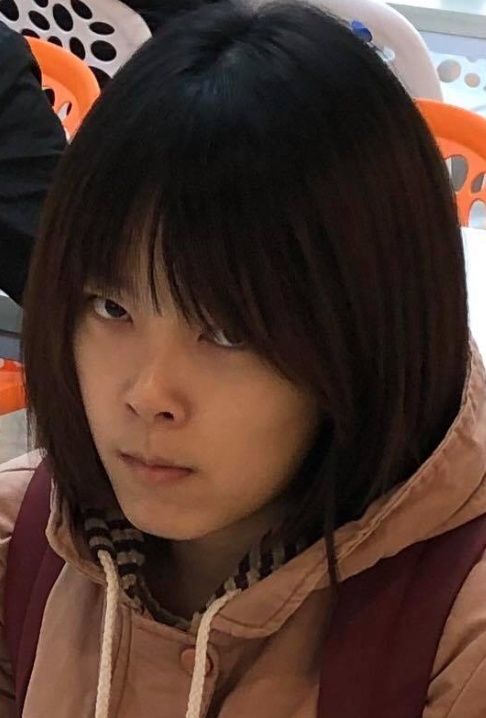

In [1]:
from IPython.display import Image
Image('./other/p1.png')